<a href="https://colab.research.google.com/github/srirampai/Active_learning/blob/main/Banking_9th_March_ClusteringExpV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import re
import string
import numpy as np
import logging
import keras
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('Train.csv')
#test_data= pd.read_csv('Test.csv')
#dimensions of the data
print(data.shape)
#print((test_data.shape))

(10003, 2)


In [ ]:
data.head()

,text,label
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived ...,card_arrival
2,I have been waiting over a week. Is the card s...,card_arrival
3,Can I track my card while it is in the process...,card_arrival
4,"How do I know if I will get my card, or if it ...",card_arrival


**High level Describe**

In [ ]:
data.describe()

,text,label
count,10003,10003
unique,10003,77
top,I am still waiting on my card?,card_payment_fee_charged
freq,1,187


**Randomly split into Train (20%), Test (25%), Pool (55%)**

In [ ]:
content=data.iloc[:,0:1]

In [ ]:
type(content)

pandas.core.frame.DataFrame

In [ ]:
content.size

10003

In [ ]:
X_train = content.sample(frac=0.20,random_state=200)
X_test = content.sample(frac=0.25,random_state=200)
X_pool = content.sample(frac=0.55,random_state=200) 

In [ ]:
print("The size of X train is", X_train.shape)
print("The size of X test is", X_test.shape)
print("The size of y test is", X_pool.shape)

The size of X train is (2001, 1)
The size of X test is (2501, 1)
The size of y test is (5502, 1)


In [ ]:
X_train

,text
7317,I did a transfer and was charged a fee that sh...
9329,"If you to to account, hit activate, and follow..."
2500,Can you explain why the ATM is giving me less ...
3192,Did you lose my money? I had added funds throu...
3592,I do not recognise this card payment.
...,...
3628,Why is there an unknown card payment?
3010,how to i go about getting my virtual card
9227,I need my card activated.
2705,I sent money to a person and they haven't rece...


**Formation of Corpus**

In [ ]:
# #Converting the column of data from excel sheet into a list of documents, where each document corresponds to a group of sentences.
# corpus=[]
# for index,row in X_intital['text'].iterrows():
#     corpus.append(row['text'])

In [ ]:
#df.itertuples():
corpus=[]
for index,row in X_train.iterrows():
    corpus.append(row['text'])


In [ ]:
corpus

['I did a transfer and was charged a fee that should not have been charged!',
 'If you to to account, hit activate, and follow the instructions, you can activate it in just a few seconds.',
 'Can you explain why the ATM is giving me less money than what I asked for?',
 'Did you lose my money? I had added funds through top-up not long ago and I know they were in my account, but they seem to have disappeared. What happened?',
 'I do not recognise this card payment.',
 'how do i cancel my account',
 'I want to start using my card.',
 'How can disposable cards be used?',
 'How do I get a PIN?',
 "I transferred some money recently and saw a fee on my account, what's that for?",
 'How can I fix this?  There is a double charge on my account.',
 'Where are the cards delivered to',
 'How do I track the card you sent me?',
 "I couldn't pay with my card",
 'I received my card, how do I get it to show in the app?',
 'Can you tell me why my transfer is pending still?',
 'I have no way to prove my i

In [ ]:
len(corpus)

2001

**Vectorisation using Count Vectoriser**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [ ]:
vectorizer.get_feature_names_out()

array(['10', '100', '18', ..., 'youngest', 'your', 'yours'], dtype=object)

**TF_IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
print(tfidf.shape ) 

(2001, 1279)


**Clustering**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
num_clusters = 77 #Change it according to your data.
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf)
clusters = km.labels_.tolist()

In [ ]:
print(len(clusters))

2001


**Convert the ouput to list & then to dataframe**

In [ ]:
output_text={'text':corpus, 'Cluster':clusters} #Creating dict having doc with the corresponding cluster number.
#frame=pd.DataFrame(output_text,index=[clusters], columns=['ext','Cluster']) # Converting it into a dataframe.


In [ ]:
training_Frame=pd.DataFrame(output_text,index=[clusters], columns=['text','Cluster']) # Converting it into a dataframe.

In [ ]:
print("\n")
print(frame) #Print the doc with the labeled cluster number.
print("\n")
print(frame['Cluster'].value_counts()) #Print the counts of doc belonging to each cluster.

In [ ]:
print("\n")
print(training_Frame) #Print the doc with the labeled cluster number.
# print("\n")
# print(frame1['Cluster'].value_counts()) #Print the counts of doc belonging to each cluster.



                                                 text  Cluster
13  I did a transfer and was charged a fee that sh...       13
29  If you to to account, hit activate, and follow...       29
26  Can you explain why the ATM is giving me less ...       26
39  Did you lose my money? I had added funds throu...       39
8               I do not recognise this card payment.        8
..                                                ...      ...
75              Why is there an unknown card payment?       75
76          how to i go about getting my virtual card       76
74                          I need my card activated.       74
0   I sent money to a person and they haven't rece...        0
24        There was a direct debit I don't recognize.       24

[2001 rows x 2 columns]


**Save it to Dataframe**

In [ ]:
training_Frame.to_csv("Training_Cluster.csv",index=False)

**Understand the Training Clustered Dataframe**

In [ ]:
training_Frame.head()

,text,Cluster
13,I did a transfer and was charged a fee that sh...,13
29,"If you to to account, hit activate, and follow...",29
26,Can you explain why the ATM is giving me less ...,26
39,Did you lose my money? I had added funds throu...,39
8,I do not recognise this card payment.,8


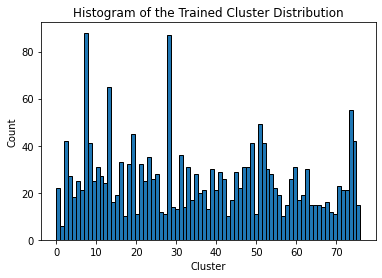

In [ ]:
fig1 = plt.hist(training_Frame['Cluster'],  edgecolor="black",bins = 77)
plt.title("Histogram of the Trained Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

**Output Text Encoding**

In [ ]:
from pandas.core.dtypes.cast import convert_dtypes
train_data['label'] =  train_data['label'].astype('category')
train_data['label_id'] = train_data['label'].cat.codes
train_data[100:200]


,text,label,label_id
100,can you share card tracking number?,card_arrival,12
101,I have not received my card and it's been a we...,card_arrival,12
102,Is there a way I can check on the card on rout...,card_arrival,12
103,When will my new card arrive?,card_arrival,12
104,Why haven't I received my new card yet?,card_arrival,12
...,...,...,...
195,I found my lost card. Am I still able to use it?,card_linking,14
196,Will I need a new card or can I put my old car...,card_linking,14
197,Is there a way to link the card i just got?,card_linking,14
198,How do I add a new card?,card_linking,14


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003 entries, 0 to 10002
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   text      10003 non-null  object  
 1   label     10003 non-null  category
 2   label_id  10003 non-null  int8    
dtypes: category(1), int8(1), object(1)
memory usage: 100.5+ KB


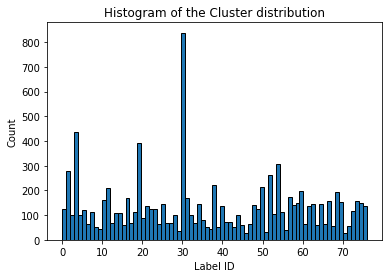

In [ ]:
dataplot = frame1['Cluster']
fig2 = plt.hist(dataplot,  edgecolor="black",bins = 77)
plt.title("Histogram of the Cluster distribution")
plt.xlabel("Label ID")
plt.ylabel("Count")
plt.show()


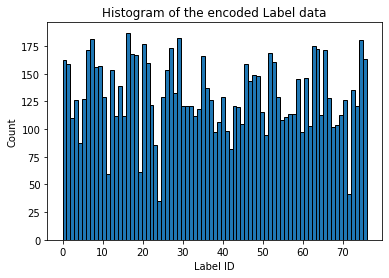

In [ ]:
fig1 = plt.hist(dataplotencoded,  edgecolor="black",bins = 77)
plt.title("Histogram of the encoded Label data")
plt.xlabel("Label ID")
plt.ylabel("Count")
plt.show()

***Save the Label encoding as Dictioanry***

In [ ]:
id_to_category = pd.Series(train_data.label.values, index = train_data.label_id).to_dict()
id_to_category

{0: 'Refund_not_showing_up',
 1: 'activate_my_card',
 2: 'age_limit',
 3: 'apple_pay_or_google_pay',
 4: 'atm_support',
 5: 'automatic_top_up',
 6: 'balance_not_updated_after_bank_transfer',
 7: 'balance_not_updated_after_cheque_or_cash_deposit',
 8: 'beneficiary_not_allowed',
 9: 'cancel_transfer',
 10: 'card_about_to_expire',
 11: 'card_acceptance',
 12: 'card_arrival',
 13: 'card_delivery_estimate',
 14: 'card_linking',
 15: 'card_not_working',
 16: 'card_payment_fee_charged',
 17: 'card_payment_not_recognised',
 18: 'card_payment_wrong_exchange_rate',
 19: 'card_swallowed',
 20: 'cash_withdrawal_charge',
 21: 'cash_withdrawal_not_recognised',
 22: 'change_pin',
 23: 'compromised_card',
 24: 'contactless_not_working',
 25: 'country_support',
 26: 'declined_card_payment',
 27: 'declined_cash_withdrawal',
 28: 'declined_transfer',
 29: 'direct_debit_payment_not_recognised',
 30: 'disposable_card_limits',
 31: 'edit_personal_details',
 32: 'exchange_charge',
 33: 'exchange_rate',
 34: 

In [ ]:
import json
with open('categorymappingJSON.txt','w') as convert_file:
      convert_file.write(json.dumps(id_to_category))